Hi all! Today you will try for the first time to write your own neural network and try to train it. We will work with pictures, but not yet in exactly the best way to do it, but it should work out well.

We will work with [dataset](https://github.com/rois-codh/kmnist) `Kuzushiji-MNIST` (`KMNIST`). These are handwritten letters, the images have sizes (28, 28, 1) and are divided into 10 classes, you can read more at the link.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from IPython.display import clear_output

## Loading Data

Now we will use built-in data, but in reality we have to write our own class for the Dataset, which has several required methods (for example, `__getitem__`), but we will discuss this later.

In [2]:
import torchvision
from torchvision.datasets import KMNIST


# Turns pictures into tensors
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor()])

# Load the data (the variables contain objects of the `Dataset` type)
# We pass the necessary transformations (ToTensor) to the `transform` argument
trainset = KMNIST(root="./KMNIST", train=True, download=True, transform=transform)
testset = KMNIST(root="./KMNIST", train=False, download=True, transform=transform)

clear_output()

Let’s define dataloaders; they are needed to implement stochastic gradient descent (that is, we don’t want to read all the images into RAM at once, but do it in batches).

In [3]:
from torch.utils.data import DataLoader

batch_size = 256

trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

Let's look at some picture:

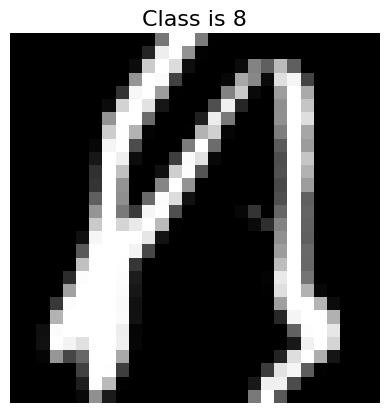

In [4]:
plt.imshow(trainset[0][0].view(28, 28).numpy(), cmap="gray")
plt.axis("off")
plt.title(f"Class is {trainset[0][1]}", fontsize=16);

### Task 1. Look at the pictures

Draw images of all 10 classes on one graph:

⣿⣿⣿⣿⣿⣿⠿⢋⣥⣴⣶⣶⣶⣬⣙⠻⠟⣋⣭⣭⣭⣭⡙⠻⣿⣿⣿⣿⣿
⣿⣿⣿⣿⡿⢋⣴⣿⣿⠿⢟⣛⣛⣛⠿⢷⡹⣿⣿⣿⣿⣿⣿⣆⠹⣿⣿⣿⣿
⣿⣿⣿⡿⢁⣾⣿⣿⣴⣿⣿⣿⣿⠿⠿⠷⠥⠱⣶⣶⣶⣶⡶⠮⠤⣌⡙⢿⣿
⣿⡿⢛⡁⣾⣿⣿⣿⡿⢟⡫⢕⣪⡭⠥⢭⣭⣉⡂⣉⡒⣤⡭⡉⠩⣥⣰⠂⠹
⡟⢠⣿⣱⣿⣿⣿⣏⣛⢲⣾⣿⠃⠄⠐⠈⣿⣿⣿⣿⣿⣿⠄⠁⠃⢸⣿⣿⡧
⢠⣿⣿⣿⣿⣿⣿⣿⣿⣇⣊⠙⠳⠤⠤⠾⣟⠛⠍⣹⣛⣛⣢⣀⣠⣛⡯⢉⣰
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⡶⠶⢒⣠⣼⣿⣿⣛⠻⠛⢛⣛⠉⣴⣿⣿
⣿⣿⣿⣿⣿⣿⣿⡿⢛⡛⢿⣿⣿⣶⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⡈⢿⣿
⣿⣿⣿⣿⣿⣿⣿⠸⣿⡻⢷⣍⣛⠻⠿⠿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⢇⡘⣿
⣿⣿⣿⣿⣿⣿⣿⣷⣝⠻⠶⣬⣍⣛⣛⠓⠶⠶⠶⠤⠬⠭⠤⠶⠶⠞⠛⣡⣿
⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣶⣬⣭⣍⣙⣛⣛⣛⠛⠛⠛⠿⠿⠿⠛⣠⣿⣿
⣦⣈⠉⢛⠻⠿⠿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠿⠛⣁⣴⣾⣿⣿⣿⣿
⣿⣿⣿⣶⣮⣭⣁⣒⣒⣒⠂⠠⠬⠭⠭⠭⢀⣀⣠⣄⡘⠿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣦⡈⢿⣿⣿⣿⣿⣿





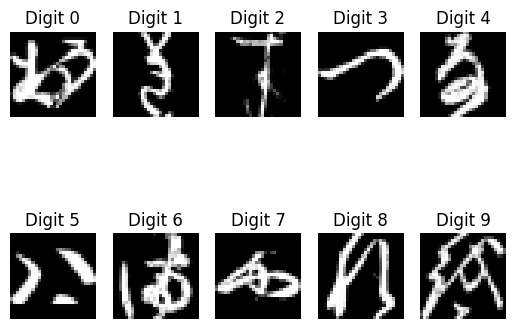

In [5]:
# nums = []
X = trainset.data.numpy()
y = trainset.targets.numpy()

fig, axs = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)

for i, dig in enumerate(np.unique(y)):
    axs.flatten()[i].imshow(X[tuple(np.where(y==dig))][0].reshape(28, 28).astype(int), cmap='gray')
    axs.flatten()[i].set_title("Digit " + str(dig))
    axs.flatten()[i].axis("off")

### Task 2. Building your first MLPts

MLP (multilayer perceptron) or a neural network of fully connected (linear) layers, we already know this.

Describe the structure of the network: 3 fully connected layers + activation functions of your choice. **Think** about activation after the last layer!

The network at the output of layer 1 should have 256 features, at the output of 2,128 features, at the output of the last layer as many as you have classes.

https://pytorch.org/docs/stable/nn.html?highlight=activation#non-linear-activations-weighted-sum-nonlinearity

In [6]:
import torch.nn as nn

class FCNet(nn.Module):
     def __init__(self):
         super().__init__() # remember this!
         ## YOUR CODE HERE
         # in_features the number of inputs for each neuron, out_features the number of neurons
         self.fc1 = nn.Linear(in_features=28*28, out_features=256)
         # in_features the number of inputs for each neuron, out_features the number of neurons
         self.fc2 = nn.Linear(in_features=256, out_features=128)
         # in_features number of pre-layer neurons, out_features number of classes (10)
         self.fc3 = nn.Linear(in_features=128, out_features=10)
         # Activation function for hidden layers
         self.activation = nn.ReLU() # you can do this, or you can do it in forward

     def forward(self, x): # Forward is called inside the __call__ method of the parent class
         ## x -> dimension tensor (BATCH_SIZE, N_CHANNELS, WIDTH, HEIGHT)
         ## we need to think about the fact that our fully connected layers accept vectors

         x = x.view(-1, 28*28) # convert the image to a vector
         x = self.fc1(x)
         x = self.activation(x)
         x = self.fc2(x)
         x = self.activation(x)
         logits = self.fc3(x)
         return logits

How many trainable parameters does your model have (weights and biases)?

**Answer:** 

Weights $28 \cdot 28 \cdot 256 + 256 \cdot 128 + 128 \cdot 10 = 234752$, biases $256 + 128 + 10 = 394$

### Task 3. Write the code for the training model


It's possible (and necessary) to look at the code of the seminar on the subject. You need to create a model, define a loss function and optimizer (start with SGD). Next, you need to train the model using the training Dataloader and calculate the loss on the training and test Dataloaders.

Let's write a function for calculation of `accuracy`:

In [ ]:
def get_accuracy(model, dataloader):
    """
    model - trained neural network
    dataloader - dataloader on which you want to calculate accuracy
    """
    correct = 0
    total = 0
    with torch.no_grad(): # Tensors inside this block will have requires_grad=False
        for images, labels in dataloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total

    return accuracy

#### Main training cycle

This code can (and often should) be put into a separate function, but for now you don’t have to do this, it’s all optional)

In [ ]:
# Let's create a model object
fc_net = FCNet()
# Define the loss function
loss_function = nn.CrossEntropyLoss()
# Let's create an optimizer for our network
lr = 0.001 # learning rate

Write a learning cycle. To begin with, 10 epochs will be enough. What `accuracy` value was obtained on the test sample?

In [ ]:
def train(n_epochs, trainloader,neural_net, optimizer, loss_function):
  loss_history = []
  for epoch in range(n_epochs):
      epoch_loss = 0
      for images, labels in trainloader: # We get a batch of training pictures
          optimizer.zero_grad() # so that it doesn’t look like in log regression, when we didn’t reset the gradients
          outputs = neural_net(images) # making predictions
          loss = loss_function(outputs, labels) # calculating loss
          loss.backward() # calculate gradient
          optimizer.step() # do a gradient descent step

          epoch_loss += loss.item()

      loss_history.append(epoch_loss/len(trainloader))

      print(f"Epoch={epoch+1} loss={loss_history[epoch]:.4f}")

      print(get_accuracy(neural_net, testloader))
  return loss_history

#### **Optimizer ADAM**

In [ ]:
n_epochs = 10
optimizer = torch.optim.Adam(fc_net.parameters(), lr=lr)
loss_history = train(n_epochs, trainloader, fc_net, optimizer, loss_function)

Epoch=1 loss=0.6255
0.7964
Epoch=2 loss=0.2802
0.8453
Epoch=3 loss=0.1922
0.869
Epoch=4 loss=0.1397
0.8856
Epoch=5 loss=0.1062
0.8906
Epoch=6 loss=0.0803
0.8947
Epoch=7 loss=0.0599
0.9002
Epoch=8 loss=0.0447
0.8992
Epoch=9 loss=0.0322
0.9016
Epoch=10 loss=0.0233
0.9022


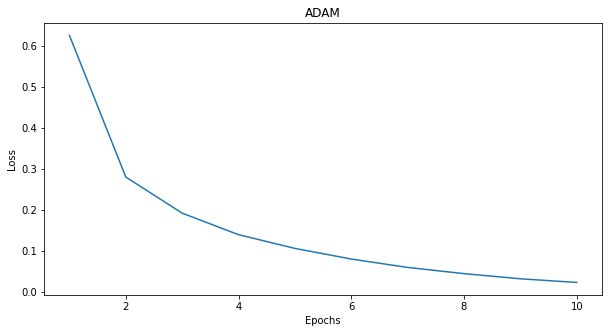

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(n_epochs)], loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ADAM")
plt.show()

#### **Optimizer SGD**

In [ ]:
n_epochs = 10
# Let's create a model object
sgd_fc_net = FCNet()
# Define the loss function
sgd_loss_function = nn.CrossEntropyLoss()
# Let's create an optimizer for our network
lr = 0.001 # learning rate

sgd_optimizer = torch.optim.SGD(sgd_fc_net.parameters(), lr=lr)
sgd_loss_history = train(n_epochs, trainloader, sgd_fc_net, sgd_optimizer, sgd_loss_function)

Epoch=1 loss=2.3048
0.12
Epoch=2 loss=2.2978
0.1318
Epoch=3 loss=2.2908
0.1449
Epoch=4 loss=2.2836
0.1623
Epoch=5 loss=2.2758
0.1869
Epoch=6 loss=2.2672
0.2124
Epoch=7 loss=2.2576
0.2367
Epoch=8 loss=2.2467
0.253
Epoch=9 loss=2.2342
0.2671
Epoch=10 loss=2.2199
0.2791


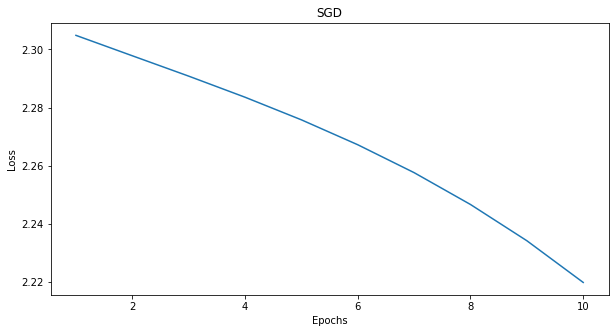

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(n_epochs)], sgd_loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD")
plt.show()

### Task 4. Studying the influence of normalization

You may have noticed that we forgot to normalize our data, and for neural networks this can be very critical.

Normalize the data.

* Calculate the mean and standard deviation of pixel intensity for all training data
* Normalize the data using these parameters (use the `Normalize` transformation)


Evaluate the impact of data normalization.

In [ ]:
mean = np.array([trainset[i][0].numpy() for i in range(len(trainset))]).mean()
std = np.array([trainset[i][0].numpy() for i in range(len(trainset))]).std()
print(mean, std)

transform_with_norm = torchvision.transforms.Compose([
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean, std)
            ])

trainset.transform = transform_with_norm
testset.transform = transform_with_norm

0.19176212 0.3483432


In [ ]:
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

#### **ADAM**

In [ ]:
# Let's create a model object
fc_net = FCNet()
# Define the loss function
loss_function = nn.CrossEntropyLoss()
# Let's create an optimizer for our network
lr = 0.001 # learning rate

In [ ]:
n_epochs = 10
optimizer = torch.optim.Adam(fc_net.parameters(), lr=lr)
loss_history = train(n_epochs, trainloader, fc_net, optimizer, loss_function)

Epoch=1 loss=0.4578
0.8237
Epoch=2 loss=0.1875
0.8726
Epoch=3 loss=0.1192
0.889
Epoch=4 loss=0.0820
0.901
Epoch=5 loss=0.0556
0.8972
Epoch=6 loss=0.0386
0.8988
Epoch=7 loss=0.0268
0.8997
Epoch=8 loss=0.0196
0.9033
Epoch=9 loss=0.0186
0.8991
Epoch=10 loss=0.0176
0.8997


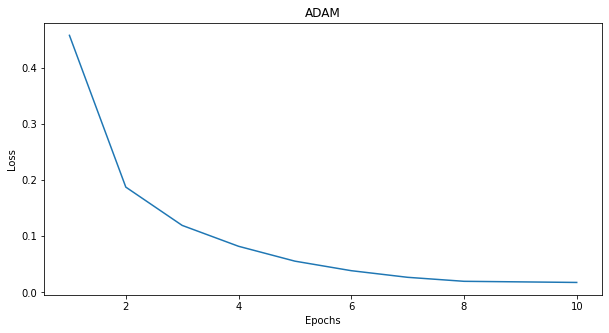

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(n_epochs)], loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ADAM")
plt.show()

How did `accuracy` change after normalization?


Before:

0.9022

After:

0.8997


Has not improved

#### **SGD**

In [ ]:
n_epochs = 10
# Let's create a model object
sgd_fc_net = FCNet()
# Define the loss function
sgd_loss_function = nn.CrossEntropyLoss()
# Let's create an optimizer for our network
lr = 0.001 # learning rate

sgd_optimizer = torch.optim.SGD(sgd_fc_net.parameters(), lr=lr)
sgd_loss_history = train(n_epochs, trainloader, sgd_fc_net, sgd_optimizer, sgd_loss_function)

Epoch=1 loss=2.2789
0.1974
Epoch=2 loss=2.2295
0.2794
Epoch=3 loss=2.1736
0.3385
Epoch=4 loss=2.1062
0.3721
Epoch=5 loss=2.0254
0.3911
Epoch=6 loss=1.9331
0.4073
Epoch=7 loss=1.8333
0.4255
Epoch=8 loss=1.7299
0.442
Epoch=9 loss=1.6259
0.4584
Epoch=10 loss=1.5247
0.4737


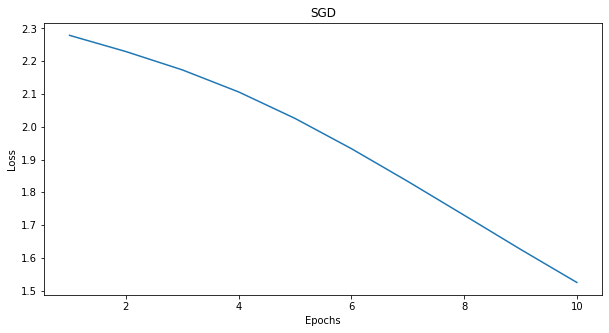

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(n_epochs)], sgd_loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD")
plt.show()

Before:

0.2791

After:

0.4737

Significantly improved

### Task 5. Studying the influence of the activation function

Explore the impact of activation functions on the learning rate and accuracy of model predictions.

Use three functions:

* [Sigmoid](https://pytorch.org/docs/stable/nn.functional.html#sigmoid)
* [GELU](https://pytorch.org/docs/stable/nn.functional.html#gelu)
* [Tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html#torch.nn.Tanh)

In [ ]:
class FCNetActivation(nn.Module):
    def __init__(self, activation_function="ReLU"):
        super().__init__() 
        ## YOUR CODE HERE
        # in_features number of inputs for each neuron, out_features number of neurons
        self.fc1 = nn.Linear(in_features=28*28, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        # in_features number of pre-layer neurons, out_features number of classes (10)
        self.fc3 = nn.Linear(in_features=128, out_features=10)
        # Activation dictionary
        self.act_dic = {
            "Sigmoid": nn.Sigmoid(),
            "GELU": nn.GELU(),
            "Tanh": nn.Tanh(),
            "ReLU": nn.ReLU(),
            "LeakyReLU": nn.LeakyReLU()
        }
        # Activation function for hidden layers
        self.activation = self.act_dic[activation_function]

    def forward(self, x):  # Forward is called inside the __call__ method of the parent class
         ## x -> dimension tensor (BATCH_SIZE, N_CHANNELS, WIDTH, HEIGHT)
         ## we need to think about the fact that our fully connected layers accept vectors

        x = x.view(-1, 28*28) # convert the image to vector
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        logits = self.fc3(x)
        return logits


#### **ReLU**

Epoch=1 loss=0.6173
0.8005
Epoch=2 loss=0.2775
0.834
Epoch=3 loss=0.1932
0.8604
Epoch=4 loss=0.1429
0.8778
Epoch=5 loss=0.1108
0.8879
Epoch=6 loss=0.0825
0.8938
Epoch=7 loss=0.0636
0.8986
Epoch=8 loss=0.0500
0.8945
Epoch=9 loss=0.0376
0.8983
Epoch=10 loss=0.0272
0.8973


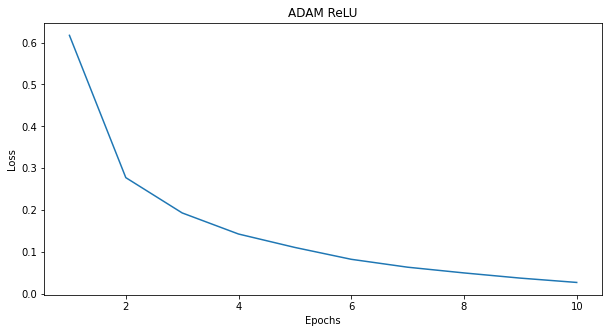

In [ ]:
fc_net = FCNetActivation(activation_function="ReLU")
loss_function = nn.CrossEntropyLoss()
lr = 0.001 

n_epochs = 10
optimizer = torch.optim.Adam(fc_net.parameters(), lr=lr)
loss_history = train(n_epochs, trainloader, fc_net, optimizer, loss_function)

plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(n_epochs)], loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ADAM ReLU")
plt.show()

#### **Sigmoid**

Epoch=1 loss=1.1661
0.6787
Epoch=2 loss=0.4907
0.7602
Epoch=3 loss=0.3515
0.8058
Epoch=4 loss=0.2730
0.8321
Epoch=5 loss=0.2211
0.8439
Epoch=6 loss=0.1835
0.8654
Epoch=7 loss=0.1523
0.8648
Epoch=8 loss=0.1290
0.8756
Epoch=9 loss=0.1069
0.8846
Epoch=10 loss=0.0899
0.8901


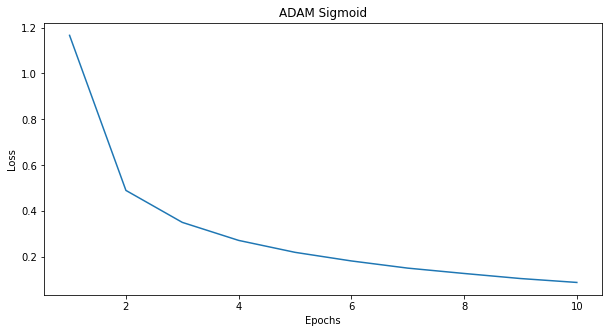

In [ ]:
fc_net = FCNetActivation(activation_function="Sigmoid")
loss_function = nn.CrossEntropyLoss()
lr = 0.001 

n_epochs = 10
optimizer = torch.optim.Adam(fc_net.parameters(), lr=lr)
loss_history = train(n_epochs, trainloader, fc_net, optimizer, loss_function)

plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(n_epochs)], loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ADAM Sigmoid")
plt.show()

#### **GELU**

Epoch=1 loss=0.6067
0.7806
Epoch=2 loss=0.2764
0.8356
Epoch=3 loss=0.1879
0.861
Epoch=4 loss=0.1387
0.8847
Epoch=5 loss=0.1026
0.8924
Epoch=6 loss=0.0793
0.8991
Epoch=7 loss=0.0591
0.8999
Epoch=8 loss=0.0442
0.8999
Epoch=9 loss=0.0336
0.9079
Epoch=10 loss=0.0242
0.9059


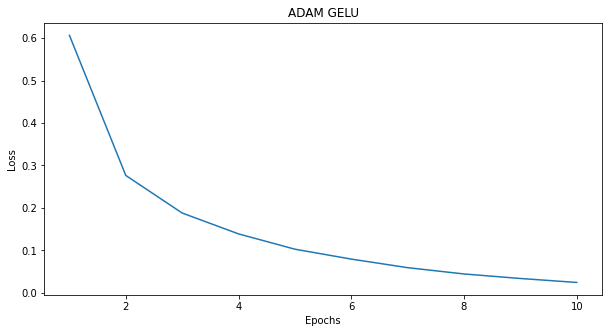

In [ ]:
fc_net = FCNetActivation(activation_function="GELU")
loss_function = nn.CrossEntropyLoss()
lr = 0.001 

n_epochs = 10
optimizer = torch.optim.Adam(fc_net.parameters(), lr=lr)
loss_history = train(n_epochs, trainloader, fc_net, optimizer, loss_function)

plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(n_epochs)], loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ADAM GELU")
plt.show()

#### **Tanh**

Epoch=1 loss=0.6259
0.7828
Epoch=2 loss=0.2907
0.8445
Epoch=3 loss=0.1978
0.8653
Epoch=4 loss=0.1412
0.8848
Epoch=5 loss=0.1037
0.8923
Epoch=6 loss=0.0762
0.8954
Epoch=7 loss=0.0554
0.8989
Epoch=8 loss=0.0397
0.8987
Epoch=9 loss=0.0278
0.9075
Epoch=10 loss=0.0212
0.9055


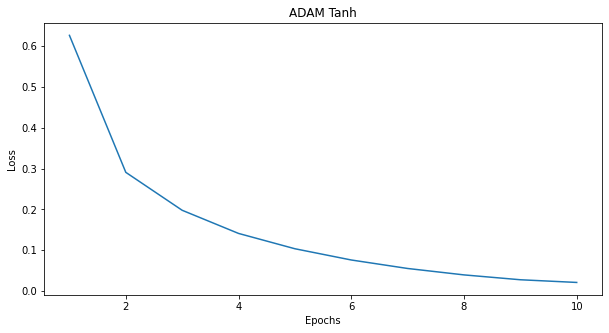

In [ ]:
fc_net = FCNetActivation(activation_function="Tanh")
loss_function = nn.CrossEntropyLoss()
lr = 0.001

n_epochs = 10
optimizer = torch.optim.Adam(fc_net.parameters(), lr=lr)
loss_history = train(n_epochs, trainloader, fc_net, optimizer, loss_function)

plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(n_epochs)], loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ADAM Tanh")
plt.show()

#### **LeakyReLU**

Epoch=1 loss=0.6198
0.7816
Epoch=2 loss=0.2856
0.8375
Epoch=3 loss=0.1960
0.8608
Epoch=4 loss=0.1449
0.8755
Epoch=5 loss=0.1112
0.8857
Epoch=6 loss=0.0857
0.8972
Epoch=7 loss=0.0634
0.8978
Epoch=8 loss=0.0485
0.8957
Epoch=9 loss=0.0362
0.9008
Epoch=10 loss=0.0260
0.8995


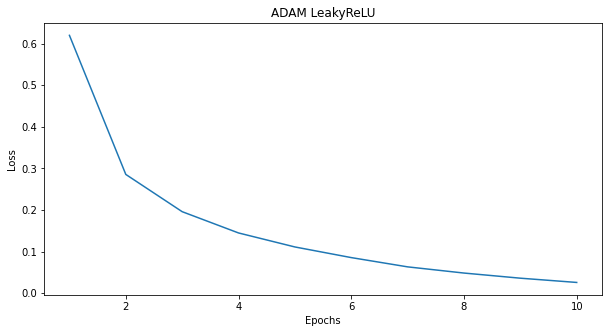

In [ ]:
fc_net = FCNetActivation(activation_function="LeakyReLU")
loss_function = nn.CrossEntropyLoss()
lr = 0.001 

n_epochs = 10
optimizer = torch.optim.Adam(fc_net.parameters(), lr=lr)
loss_history = train(n_epochs, trainloader, fc_net, optimizer, loss_function)

plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(n_epochs)], loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ADAM LeakyReLU")
plt.show()

Using which activation function was it possible to achieve the greatest `accuracy`?


GELU

### Task 6. Other optimizers


Explore the impact of optimizers on model learning speed and prediction accuracy.

Try the following:

* [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)
* [RMSprop](https://pytorch.org/docs/stable/generated/torch.optim.RMSprop.html#torch.optim.RMSprop)
* [Adagrad](https://pytorch.org/docs/stable/generated/torch.optim.Adagrad.html#torch.optim.Adagrad)

You need to train 3 models again and compare their performance (use the activation function that performed best).

#### **ADAM**

Epoch=1 loss=0.3818
0.8539
Epoch=2 loss=0.1761
0.8664
Epoch=3 loss=0.1340
0.8742
Epoch=4 loss=0.1088
0.89
Epoch=5 loss=0.0999
0.8925
Epoch=6 loss=0.0827
0.8714
Epoch=7 loss=0.0800
0.8765
Epoch=8 loss=0.0803
0.8857
Epoch=9 loss=0.0757
0.8844
Epoch=10 loss=0.0729
0.8995


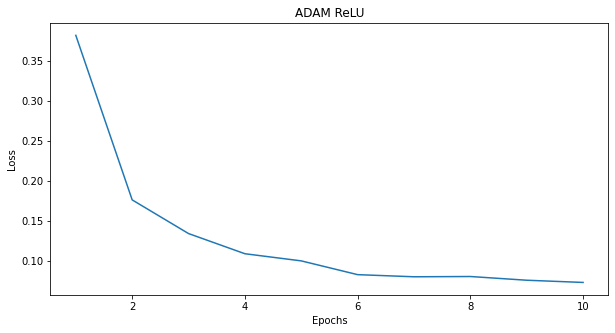

In [ ]:
fc_net = FCNetActivation(activation_function="ReLU")
loss_function = nn.CrossEntropyLoss()
lr = 0.01 

n_epochs = 10
optimizer = torch.optim.Adam(fc_net.parameters(), lr=lr)
loss_history = train(n_epochs, trainloader, fc_net, optimizer, loss_function)

plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(n_epochs)], loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ADAM ReLU")
plt.show()

#### **RMSprop**

Epoch=1 loss=1.7105
0.7526
Epoch=2 loss=0.3083
0.7794
Epoch=3 loss=0.2435
0.8182
Epoch=4 loss=0.2074
0.7723
Epoch=5 loss=0.1882
0.8141
Epoch=6 loss=0.1629
0.868
Epoch=7 loss=0.1478
0.8498
Epoch=8 loss=0.1287
0.8351
Epoch=9 loss=0.1280
0.8454
Epoch=10 loss=0.1123
0.8653


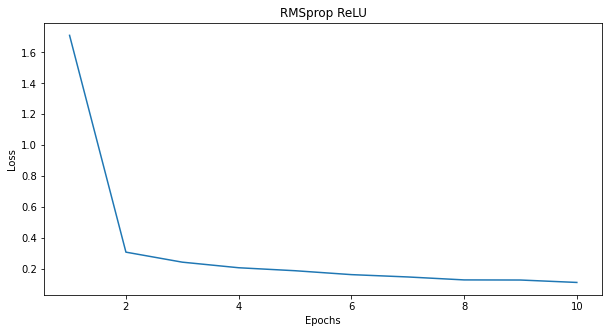

In [ ]:
fc_net = FCNetActivation(activation_function="ReLU")
loss_function = nn.CrossEntropyLoss()
lr = 0.01 

n_epochs = 10
optimizer = torch.optim.RMSprop(fc_net.parameters(), lr=lr)
loss_history = train(n_epochs, trainloader, fc_net, optimizer, loss_function)

plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(n_epochs)], loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("RMSprop ReLU")
plt.show()

#### **Adagrad**

Epoch=1 loss=0.4757
0.8018
Epoch=2 loss=0.2365
0.8487
Epoch=3 loss=0.1778
0.8698
Epoch=4 loss=0.1428
0.8757
Epoch=5 loss=0.1201
0.882
Epoch=6 loss=0.1020
0.8916
Epoch=7 loss=0.0888
0.8888
Epoch=8 loss=0.0773
0.8938
Epoch=9 loss=0.0682
0.9004
Epoch=10 loss=0.0604
0.8928


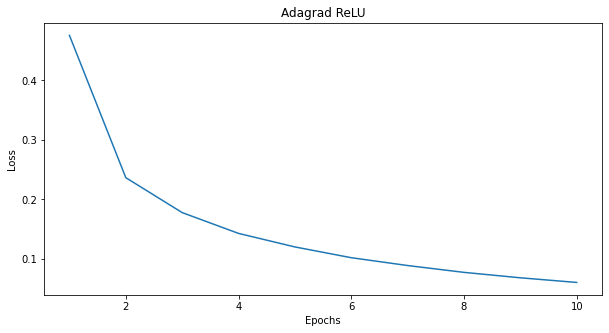

In [ ]:
fc_net = FCNetActivation(activation_function="ReLU")
loss_function = nn.CrossEntropyLoss()
lr = 0.01 

n_epochs = 10
optimizer = torch.optim.Adagrad(fc_net.parameters(), lr=lr)
loss_history = train(n_epochs, trainloader, fc_net, optimizer, loss_function)

plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(n_epochs)], loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Adagrad ReLU")
plt.show()

Best one is still Adam.

### Task 7. Implementation of ReLU


Implement the ReLU activation function yourself.
Replace the activation function in the already trained model with yours. Make sure nothing has changed.

In [ ]:
class CustomReLU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        # YOUR CODE HERE
        # if element x < 0, then 0, if >= 0, then x
        x[x<0] = 0
        return x

class FCNetCustomReLU(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=28*28, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=10)
        # Activation function for hidden layers
        self.activation = CustomReLU()

    def forward(self, x):

        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        logits = self.fc3(x)
        return logits


Retrain the model and check that the `CustomReLU` implementation is correct.

#### **Pytorch**

Epoch=1 loss=0.6095
0.784
Epoch=2 loss=0.2819
0.828
Epoch=3 loss=0.1918
0.8587
Epoch=4 loss=0.1409
0.8791
Epoch=5 loss=0.1063
0.8909
Epoch=6 loss=0.0806
0.8926
Epoch=7 loss=0.0613
0.8903
Epoch=8 loss=0.0468
0.8937
Epoch=9 loss=0.0329
0.9031
Epoch=10 loss=0.0250
0.901


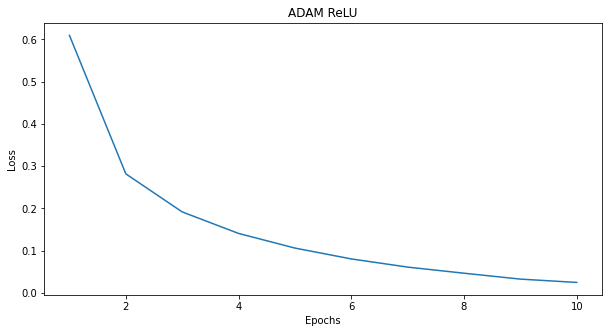

In [ ]:
fc_net = FCNetActivation(activation_function="ReLU")
loss_function = nn.CrossEntropyLoss()
lr = 0.001 

n_epochs = 10
optimizer = torch.optim.Adam(fc_net.parameters(), lr=lr)
loss_history = train(n_epochs, trainloader, fc_net, optimizer, loss_function)

plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(n_epochs)], loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ADAM ReLU")
plt.show()

#### **CustomReLU**

Epoch=1 loss=0.6110
0.7906
Epoch=2 loss=0.2842
0.8433
Epoch=3 loss=0.1998
0.8572
Epoch=4 loss=0.1465
0.8741
Epoch=5 loss=0.1123
0.884
Epoch=6 loss=0.0862
0.8942
Epoch=7 loss=0.0666
0.8999
Epoch=8 loss=0.0484
0.8972
Epoch=9 loss=0.0354
0.8994
Epoch=10 loss=0.0267
0.894


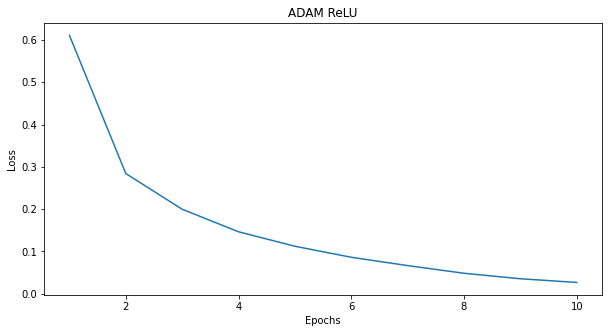

In [ ]:
fc_net = FCNetCustomReLU()
loss_function = nn.CrossEntropyLoss()
lr = 0.001

n_epochs = 10
optimizer = torch.optim.Adam(fc_net.parameters(), lr=lr)
loss_history = train(n_epochs, trainloader, fc_net, optimizer, loss_function)

plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(n_epochs)], loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ADAM ReLU")
plt.show()